<a href="https://colab.research.google.com/github/chaoszd/PandasProject/blob/main/Titanicfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nino1=pd.read_csv('train.csv')
nino2=pd.read_csv('test.csv')

In [ ]:
nino1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nino1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
new = nino1.Name.str.split(pat=' ', n=1, expand=True)
new1=new[1].str.split(pat=' ', n=1, expand=True)
nino1['Name']=new1[0]
nino1.Name=nino1.Name.apply(lambda x: 4 if x=='Mrs.' else(3 if x=='Miss.' else (2 if x=='Master.' else (1 if x=='Mr.' else 0)) ) )
wen = nino2.Name.str.split(pat=' ', n=1, expand=True)
wen1=wen[1].str.split(pat=' ', n=1, expand=True)
nino2['Name']=wen1[0]
nino2.Name=nino2.Name.apply(lambda x: 4 if x=='Mrs.' else(3 if x=='Miss.' else (2 if x=='Master.' else (1 if x=='Mr.' else 0)) ) )

<Axes: xlabel='Embarked', ylabel='Survived'>

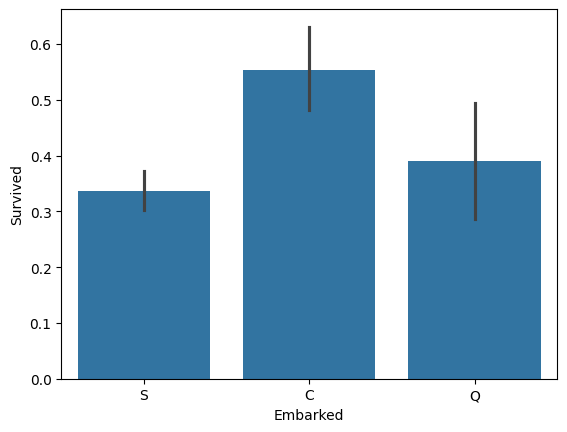

In [ ]:
sns.barplot(x='Embarked',y='Survived',data=nino1)

In [ ]:
nino1.Embarked=nino1.Embarked.apply(lambda x: 2 if x=='S' else(1 if x=='Q' else 0))
nino2.Embarked=nino2.Embarked.apply(lambda x: 2 if x=='S' else(1 if x=='Q' else 0))


In [ ]:
nino1.groupby(['Pclass','Sex']).mean('Age')

PassengerId  Survived      Name        Age     SibSp     Parch  \
Pclass Sex                                                                      
1      female   469.212766  0.968085  3.212766  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  0.909836  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  3.460526  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  0.990741  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  3.166667  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  1.048991  26.507589  0.498559  0.224784   

                     Fare  Embarked  
Pclass Sex                           
1      female  106.125798  1.031915  
       male     67.226127  1.303279  
2      female   21.970121  1.789474  
       male     19.741782  1.805556  
3      female   16.118810  1.451389  
       male     12.661633  1.639769

In [ ]:
bla=[nino1[(nino1.Pclass==1) & (nino1.Sex=='female')].Age.mean(),nino1[(nino1.Pclass==2) & (nino1.Sex=='female')].Age.mean(),
     nino1[(nino1.Pclass==3) & (nino1.Sex=='female')].Age.mean(),nino1[(nino1.Pclass==1) & (nino1.Sex=='male')].Age.mean(),
     nino1[(nino1.Pclass==2) & (nino1.Sex=='male')].Age.mean(), nino1[(nino1.Pclass==3) & (nino1.Sex=='male')].Age.mean()]
bla

[34.61176470588235,
 28.722972972972972,
 21.75,
 41.28138613861386,
 30.74070707070707,
 26.507588932806325]

In [ ]:
nino1[(nino1.Pclass==1) & (nino1.Sex=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,4,female,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,4,female,35.0,1,0,113803,53.1000,C123,2
11,12,1,1,3,female,58.0,0,0,113783,26.5500,C103,2
31,32,1,1,4,female,NaN,1,0,PC 17569,146.5208,B78,0
52,53,1,1,4,female,49.0,1,0,PC 17572,76.7292,D33,0
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,4,female,45.0,1,1,36928,164.8667,NaN,2
862,863,1,1,4,female,48.0,0,0,17466,25.9292,D17,2
871,872,1,1,4,female,47.0,1,1,11751,52.5542,D35,2
879,880,1,1,4,female,56.0,0,1,11767,83.1583,C50,0


In [ ]:
x1= nino1[(nino1.Pclass==1) & (nino1.Sex=='female')].loc[pd.isna(nino1[(nino1.Pclass==1) & (nino1.Sex=='female')]['Age']), :].index
for x in x1:
    nino1.loc[x,'Age']=bla[0]
x1= nino2[(nino1.Pclass==1) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='female')]['Age']), :].index
for x in x1:
    nino2.loc[x,'Age']=bla[0]

<ipython-input-109-a5190ffb11d0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1= nino2[(nino1.Pclass==1) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='female')]['Age']), :].index
<ipython-input-109-a5190ffb11d0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1= nino2[(nino1.Pclass==1) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='female')]['Age']), :].index


In [ ]:
x2= nino1[(nino1.Pclass==2) & (nino1.Sex=='female')].loc[pd.isna(nino1[(nino1.Pclass==2) & (nino1.Sex=='female')]['Age']), :].index
for x in x2:
    nino1.loc[x,'Age']=bla[1]
x2= nino2[(nino1.Pclass==2) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='female')]['Age']), :].index
for x in x2:
    nino2.loc[x,'Age']=bla[1]

<ipython-input-110-bed29d4ba0f1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2= nino2[(nino1.Pclass==2) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='female')]['Age']), :].index
<ipython-input-110-bed29d4ba0f1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2= nino2[(nino1.Pclass==2) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='female')]['Age']), :].index


In [ ]:
x3= nino1[(nino1.Pclass==3) & (nino1.Sex=='female')].loc[pd.isna(nino1[(nino1.Pclass==3) & (nino1.Sex=='female')]['Age']), :].index
for x in x3:
    nino1.loc[x,'Age']=bla[2]
x3= nino2[(nino1.Pclass==3) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='female')]['Age']), :].index
for x in x3:
    nino2.loc[x,'Age']=bla[2]

<ipython-input-111-bf490cf47238>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x3= nino2[(nino1.Pclass==3) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='female')]['Age']), :].index
<ipython-input-111-bf490cf47238>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x3= nino2[(nino1.Pclass==3) & (nino2.Sex=='female')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='female')]['Age']), :].index


In [ ]:
x4= nino1[(nino1.Pclass==1) & (nino1.Sex=='male')].loc[pd.isna(nino1[(nino1.Pclass==1) & (nino1.Sex=='male')]['Age']), :].index
for x in x4:
    nino1.loc[x,'Age']=bla[3]
x4= nino2[(nino1.Pclass==1) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='male')]['Age']), :].index
for x in x4:
    nino2.loc[x,'Age']=bla[3]

<ipython-input-112-6b701c902dc2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x4= nino2[(nino1.Pclass==1) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='male')]['Age']), :].index
<ipython-input-112-6b701c902dc2>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x4= nino2[(nino1.Pclass==1) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==1) & (nino2.Sex=='male')]['Age']), :].index


In [ ]:
x5= nino1[(nino1.Pclass==2) & (nino1.Sex=='male')].loc[pd.isna(nino1[(nino1.Pclass==2) & (nino1.Sex=='male')]['Age']), :].index
for x in x5:
    nino1.loc[x,'Age']=bla[4]
x5= nino2[(nino1.Pclass==2) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='male')]['Age']), :].index
for x in x5:
    nino2.loc[x,'Age']=bla[4]

<ipython-input-113-38e37b46a0c0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x5= nino2[(nino1.Pclass==2) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='male')]['Age']), :].index
<ipython-input-113-38e37b46a0c0>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x5= nino2[(nino1.Pclass==2) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==2) & (nino2.Sex=='male')]['Age']), :].index


In [ ]:
x6= nino1[(nino1.Pclass==3) & (nino1.Sex=='male')].loc[pd.isna(nino1[(nino1.Pclass==3) & (nino1.Sex=='male')]['Age']), :].index
for x in x6:
    nino1.loc[x,'Age']=bla[5]
x6= nino2[(nino1.Pclass==3) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='male')]['Age']), :].index
for x in x6:
    nino2.loc[x,'Age']=bla[5]

<ipython-input-114-f7b444354797>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x6= nino2[(nino1.Pclass==3) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='male')]['Age']), :].index
<ipython-input-114-f7b444354797>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x6= nino2[(nino1.Pclass==3) & (nino2.Sex=='male')].loc[pd.isna(nino2[(nino1.Pclass==3) & (nino2.Sex=='male')]['Age']), :].index


In [ ]:
nino1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
nino1.drop('Cabin',axis=1,inplace=True)
nino2.drop('Cabin',axis=1,inplace=True)

In [ ]:
nino1.drop(['PassengerId','Ticket'],axis=1,inplace=True)
nino2.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
nino1[['Sex']]=ordinal_encoder.fit_transform(nino1[['Sex']])
nino2[['Sex']]=ordinal_encoder.fit_transform(nino2[['Sex']])

In [ ]:
nino1.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.521763,-0.543351,-0.067485,-0.035322,0.081629,0.257307,-0.174199
Pclass,-0.338481,1.000000,-0.096652,0.131900,-0.407015,0.083081,0.018443,-0.549500,0.170334
Name,0.521763,-0.096652,1.000000,-0.878647,-0.125612,0.169198,0.320226,0.168933,-0.071596
Sex,-0.543351,0.131900,-0.878647,1.000000,0.112851,-0.114631,-0.245489,-0.182333,0.115513
Age,-0.067485,-0.407015,-0.125612,0.112851,1.000000,-0.251313,-0.180705,0.118308,-0.019950
SibSp,-0.035322,0.083081,0.169198,-0.114631,-0.251313,1.000000,0.414838,0.159651,0.070653
Parch,0.081629,0.018443,0.320226,-0.245489,-0.180705,0.414838,1.000000,0.216225,0.042325
Fare,0.257307,-0.549500,0.168933,-0.182333,0.118308,0.159651,0.216225,1.000000,-0.229304
Embarked,-0.174199,0.170334,-0.071596,0.115513,-0.019950,0.070653,0.042325,-0.229304,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
  vif=pd.DataFrame()
  vif["variables"]=z.columns
  vif["vif"]=[variance_inflation_factor(z.values,i) for i in range(z.shape[1])]
  return(vif)
nino4=nino1.drop(['Survived'],axis=1)

z=nino4.iloc[:,0:13]
calc_vif(z)

,variables,vif
0,Pclass,10.110704
1,Name,8.031643
2,Sex,7.842104
3,Age,6.002183
4,SibSp,1.586287
5,Parch,1.656889
6,Fare,1.975184
7,Embarked,4.966247


In [ ]:
X=nino1.drop(['Survived'],axis=1)
y=nino1.Survived

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predcitions=logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,predcitions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.86      0.71      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [ ]:
print(accuracy_score(y_test,predcitions))

0.8212290502793296


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

75.98


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

67.04


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

82.12


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

83.24


In [ ]:
predictions = logmodel.predict(nino2)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
nino2.Fare.fillna(nino2[nino2.Pclass==3].Fare.mean(),inplace=True)

In [ ]:
nino5=pd.read_csv('test.csv')

ids=nino5.PassengerId
ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })


In [ ]:
output.to_csv('submission.csv', index=False)
